<a href="https://colab.research.google.com/github/Muhammad-Ibrahim-Khan/Book-Review-Sentiment/blob/main/Sentimentic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/KeithGalli/sklearn/raw/master/data/sentiment/Books_small_10000.json

--2022-02-17 06:55:12--  https://github.com/KeithGalli/sklearn/raw/master/data/sentiment/Books_small_10000.json
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/KeithGalli/sklearn/master/data/sentiment/Books_small_10000.json [following]
--2022-02-17 06:55:13--  https://raw.githubusercontent.com/KeithGalli/sklearn/master/data/sentiment/Books_small_10000.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8063542 (7.7M) [text/plain]
Saving to: ‘Books_small_10000.json’

Books_small_10000.j 100%[===================>]   7.69M  --.-KB/s    in 0.1s    

2022-02-17 06:55:14 (70.3 MB/s) - ‘Books_small_10

# Demonstrating sentiment analysis using bag of words on a text corpus

The data was taken from amazon's website where they have a catalogue of reviews for different products. These reviews and the ratings will be used to create a sentiment detector where we give the model a review and it outputs the sentiment as either Positive, Negative or Neutral. Below is the link for the webiste:

> https://nijianmo.github.io/amazon/index.html

For demonstration purpose, we have only taken the first 10k examples to train and test our model. The purposes this demonstration will fulfill are:
- Showcasing the train-test split function
- Using a json raw data to load & prepare our relevant datasets
- Using two feature extractors to showoff the scikit-learn API and its flexibility
- Demonstrate several classifiers to see the reproducibility prospect of scikit-learn
- Demonstrate, by changing our dataset, the scalability part of this API
- View our results using a Confusion Matrix and ask for suggestions

## Create Classes

Our input data has two parts:
- 1) Review: Text data on which we're going to train our model.
- 2) Score: Rating the user has given from 1-5; also our target.

We intend to create a class whose instance will have the raw text data and a sentiment as members of it.

In [ ]:
import random

class Sentiment:
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'
    POSITIVE = 'POSITIVE'

    
class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else:
            return Sentiment.POSITIVE
        
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
    
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        neutral = list(filter(lambda x: x.sentiment == Sentiment.NEUTRAL, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        
        min_length = min(len(positive), len(negative), len(neutral))

        positive_shrunk = positive[:min_length]
        negative_shrunk = negative[:min_length]
        neutral_shrunk = neutral[:min_length]
        self.reviews = negative_shrunk + positive_shrunk + neutral_shrunk

        random.shuffle(self.reviews)
    

## Load Data

In [ ]:
import json

file_name = '/content/Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
    
# Taking a look at an example of our data
print(reviews[5].text)
print(reviews[5].score)
print(reviews[5].sentiment)

I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia's trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character's voice on a strong subject and making it so that other peoples story may be heard through Mia's.
5.0
POSITIVE


In [ ]:
type(reviews[5].text)

## Prepare Data
#### Pre-processing

In [ ]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.10, 
                random_state = 42)

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

train_container.evenly_distribute()
test_container.evenly_distribute()

train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_x = test_container.get_text()
test_y = test_container.get_sentiment()

## Bag of words Vectorizer, showcasing the CountVectorizer and TFIDF feature extractor

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x) # Performs fitting and transform in the same step
test_x_vectors = vectorizer.transform(test_x) # Don't wanna fit


print(train_x[0])
print(train_y[0])

print(train_x_vectors[0])

The next In Galli's series about her VA characters and this one focuses on a character that intrigued me from Wasted Heart, so I was happy that Jessie was getting her own book. This one switches between first person for Jessie's scenes and third person for Lauren's story, so Lauren's a bit more fleshed out than Elise from the previous book. However the book suffers from the leads spending most of their time dating other people, and then pushing and pulling with each other for the last third of the book. Also Lauren's known Jessie for 11 years, but doesn't seem to know her at all and finds out most of her new info about Jessie from other people and not from talking to Jessie, so it was hard to see why Jessie liked Lauren so much. It's not the best in the series but it's ok.
NEUTRAL
  (0, 8576)	0.06417401857594932
  (0, 1416)	0.05059228611294685
  (0, 8143)	0.03751907707813668
  (0, 7284)	0.05430537887720623
  (0, 13527)	0.0490032951718614
  (0, 10834)	0.04661968795935091
  (0, 5687)	0.0

# Classification


### Importing modules

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

#### Linear SVM

In [ ]:
clf_svm = SVC(kernel='linear') # You may choose the kernel to be RBF or linear; read documentation for more info.

clf_svm.fit(train_x_vectors, train_y)

# Testing our classifier on an example

print(test_x[0])
#print(test_x_vectors[0])

clf_svm.predict(test_x_vectors[0])

In reading this story my thoughts were flashing on Kristen Ashley's motorcycle club series.  The similarities made me wonder who published first.I had trouble following how the various characters tied together.  If the lead character's father was powerful, why did he not destroy the young man and his friends who sexually abused her?  The characters were not believable, the dialogue was okay, nothing memorable.  The story line was rambling.I may re-read this book and might be interested in other works by this author.Remember this is my personal opinion and does not reflect on the author.


array(['NEGATIVE'], dtype='<U8')

#### Decision Tree

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_x_vectors, train_y)

clf_dt.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

#### Naive Bayes

In [ ]:
clf_nb = GaussianNB()

# Requires a dense array as input whereas CountVectorizer by default returns a sparse array.
clf_nb.fit(train_x_vectors.toarray(), train_y) 

clf_nb.predict(test_x_vectors[0].toarray())

array(['POSITIVE'], dtype='<U8')

#### Logistic Regression

In [ ]:
clf_lr = LogisticRegression(max_iter=50000) 
# The max_iter is introduced because our data is not normalized(optimized) for this model.

clf_lr.fit(train_x_vectors, train_y) 

clf_lr.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

## Evaluation of models on test set

#### Mean Accuracy

In [ ]:
# Score for our SVM Classifier
print(f"The accuracy of our SVM Classifier on test set = {clf_svm.score(test_x_vectors, test_y):.3f} ")

# Score for our Decision Tree Classifier
print(f"The accuracy of our Decision Tree Classifier on test set = {clf_dt.score(test_x_vectors, test_y):.3f} ")

# Score for our Naive Bayes Classifier
print(f"The accuracy of our Naive Bayes Classifier on test set = {clf_nb.score(test_x_vectors.toarray(), test_y):.3f} ")

# Score for our Logistic Regression Classifier
print(f"The accuracy of our Logistic Regression Classifier on test set = {clf_lr.score(test_x_vectors, test_y):.3f} ")


The accuracy of our SVM Classifier on test set = 0.577 
The accuracy of our Decision Tree Classifier on test set = 0.446 
The accuracy of our Naive Bayes Classifier on test set = 0.435 
The accuracy of our Logistic Regression Classifier on test set = 0.613 


#### F1 Score
Combines precision and recall to evaluate our model with the following formula:
>F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import f1_score

# F1 Score for our SVM Classifier
svm_score = f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
print(f"The F1 score of our SVM Classifier on test set is: For Positive = {svm_score[0]:.2f}, For Neutral = {svm_score[1]:.2f}, For Negative = {svm_score[2]:.2f}")
# svm_score

# F1 Score for our Decision Tree Classifier
dt_score = f1_score(test_y, clf_dt.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
print(f"The F1 score of our Decision Tree Classifier on test set is: For Positive = {dt_score[0]:.2f}, For Neutral = {dt_score[1]:.2f}, For Negative = {dt_score[2]:.2f}")

# F1 Score for our Naive Bayes Classifier
nb_score = f1_score(test_y, clf_nb.predict(test_x_vectors.toarray()), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
print(f"The F1 score of our Naive Bayes Classifier on test set is: For Positive = {nb_score[0]:.2f}, For Neutral = {nb_score[1]:.2f}, For Negative = {nb_score[2]:.2f}")

# F1 Score for our Logistic Regression Classifier
lr_score = f1_score(test_y, clf_lr.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
print(f"The F1 score of our Logistic Regression Classifier on test set is: For Positive = {lr_score[0]:.2f}, For Neutral = {lr_score[1]:.2f}, For Negative = {lr_score[2]:.2f} ")

The F1 score of our SVM Classifier on test set is: For Positive = 0.66, For Neutral = 0.50, For Negative = 0.57
The F1 score of our Decision Tree Classifier on test set is: For Positive = 0.49, For Neutral = 0.40, For Negative = 0.46
The F1 score of our Naive Bayes Classifier on test set is: For Positive = 0.39, For Neutral = 0.42, For Negative = 0.48
The F1 score of our Logistic Regression Classifier on test set is: For Positive = 0.71, For Neutral = 0.49, For Negative = 0.63 


## Conclusion
The F1 score is telling us that when it comes to marking an input as positive our models have good results but for the other 2 sentiments the results are extremely bad(remember that F1 score accounts for precision and recall). So this means that our models are not at fault here since the same test data was provided to all models(classifiers) hence we have good reproducibility.
Now we have to check our data that we split into training and test sets.

## Observing our data

In [ ]:
# Checking our training data
print(f"Size of our training data = {len(train_y)}")
print(f"Number of positive labels in our training data = {train_y.count(Sentiment.POSITIVE)}")
print(f"Percentage of positively labeled data = {train_y.count(Sentiment.POSITIVE)/len(train_y) * 100}")

Size of our training data = 1764
Number of positive labels in our training data = 588
Percentage of positively labeled data = 33.33333333333333


## Improvements to our model

In [ ]:
# Pre-processing stage



### Test example(from user)

In [ ]:
test_set = ['This is an abomination.', 'Good, for a disaster.', 'Meh.', 'Kind of vague but good.',
            'An exquisite read.', 'A book to enjoy by a fireplace with a cup of tea.']
new_test = vectorizer.transform(test_set)

print(f"SVM's predictions: {clf_svm.predict(new_test)}")
print(f"Decision Tree's predictions: {clf_dt.predict(new_test)}")
print(f"Naive Bayes's predictions: {clf_nb.predict(new_test.toarray())}")
print(f"Logistic Regression's predictions: {clf_lr.predict(new_test)}")


SVM's predictions: ['POSITIVE' 'NEUTRAL' 'NEGATIVE' 'NEUTRAL' 'POSITIVE' 'NEGATIVE']
Decision Tree's predictions: ['POSITIVE' 'NEUTRAL' 'POSITIVE' 'POSITIVE' 'NEUTRAL' 'POSITIVE']
Naive Bayes's predictions: ['NEGATIVE' 'NEUTRAL' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE']
Logistic Regression's predictions: ['POSITIVE' 'NEUTRAL' 'NEGATIVE' 'NEUTRAL' 'POSITIVE' 'NEGATIVE']


## Tuning our Model with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[1.0, 4.0, 8.0]}

svc = SVC()
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(train_x_vectors, train_y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1.0, 4.0, 8.0],
                         'kernel': ['linear', 'rbf', 'poly']})

#### Viewing our best parameters

In [ ]:
print(clf.best_params_)

{'C': 4.0, 'kernel': 'rbf'}


### Checking our model's performance

In [ ]:
# Score for our SVM Classifier
print(f"The accuracy of our SVM Classifier on test set = {clf.score(test_x_vectors, test_y):.3f} ")

# F1 Score for our SVM Classifier
svm_score = f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
print(f"The F1 score of our SVM Classifier on test set is: For Positive = {svm_score[0]:.2f}, For Neutral = {svm_score[1]:.2f}, For Negative = {svm_score[2]:.2f}")


The accuracy of our SVM Classifier on test set = 0.601 
The F1 score of our SVM Classifier on test set is: For Positive = 0.66, For Neutral = 0.50, For Negative = 0.57


## Saving our Model

In [ ]:
# import pickle

# with open('./models/sentiment_classifier.pkl', 'wb') as f:
#     pickle.dump(clf, f)

## Loading our Model

In [ ]:
# import pickle

# with open('./models/sentiment_classifier.pkl', 'rb') as f:
#     clf = pickle.load(f)

## Confusion Matrix

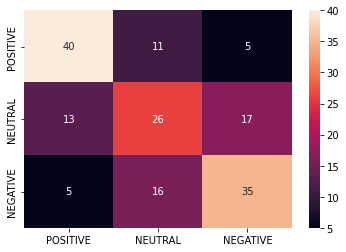

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y_pred = clf.predict(test_x_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')